In [1]:
# importando bibliotecas uteis em python:
import numpy as np
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from scipy import signal

### Script para simular um perfil sintético gravimétrico. A fonte enterrada é uma esfera (fonte pontual) localizada nas coordenadas cartesianas (xc, zc) definidas pelo usuário.

### A equação que computa a componente vertical (z) da atração gravitacional produzida por uma fonte pontual é :
# $g_z = -G\frac{m (z-zc)}{((x-xc)^2 + (z-zc)^2)^{3/2}}$


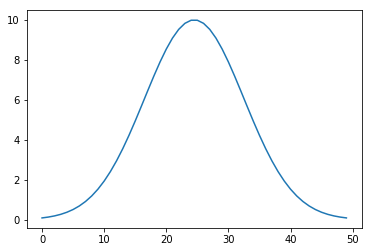

In [2]:
# definicao das coordenadas do perfil sintetico:
e = 2.71
def posgrav(xmin,xmax,n):
    #vetor de coordenadas das diferentes posicoes do gravimetro
    x = np.linspace(xmin, xmax, n, endpoint= True ) # coordenadas x do perfil
    return x
x = posgrav(-100,100,50)
z = 10*signal.gaussian(50, std=8)
plt.plot(z)
plt.show()

In [3]:
#DEFININDO ALGUMAS CONSTANTES
G = 6.674*(10**(-11)) # constante universal no SI:
si2mGal = 100000.0 # conversor de unidades
pi_edson = 3.1415 # não presi
pi = np.pi

In [22]:
# Definicao das propriedades da fonte esferica:
xc = [-50.0,50.0]
zc = [150.0,200.0] 
xmed = 0
zmed = 175
def volfont(raio,rho):
    V = (4.0/3.0) * pi * raio**3 * rho
    massa = V * rho
    return raio,rho,V,massa
raio = volfont(10,2000)[0] # metros
rho = volfont(10,2000)[1] #kg/m3
V = volfont(10,2000)[2] # m3
massa = volfont(10,2000)[3] # kg

In [23]:
# calculo da componente vertical gz:
gz = np.zeros(50)
def gzvert(massa,xcentro,zcentro,posgrav,alt):
    gz =  - G * massa * (z-zcentro) / ( (posgrav-xcentro)**2 + (z-zcentro)**2 )**(3/2)
    return gz*si2mGal
for i in range(0,2):
    gz += gzvert(massa,xc[i],zc[i],x,z)
print(gz)    

[5.67979574 5.82665419 5.97055619 6.11108386 6.24791632 6.38084127
 6.50975624 6.63465595 6.75560306 6.87268111 6.98593012 7.09526818
 7.20040496 7.30075624 7.39537129 7.4828869  7.56152249 7.6291287
 7.68329698 7.72152906 7.74145386 7.74106746 7.71896258 7.67451081
 7.60796669 7.52047557 7.41398544 7.29107979 7.15476054 7.00821431
 6.85459202 6.69682439 6.53748583 6.37871049 6.22215724 6.0690158
 5.92004427 5.77562771 5.63584818 5.50055834 5.36945223 5.24212875
 5.11814517 4.99705937 4.87846051 4.76198926 4.64734868 4.53430777
 4.42269937 4.31241441]


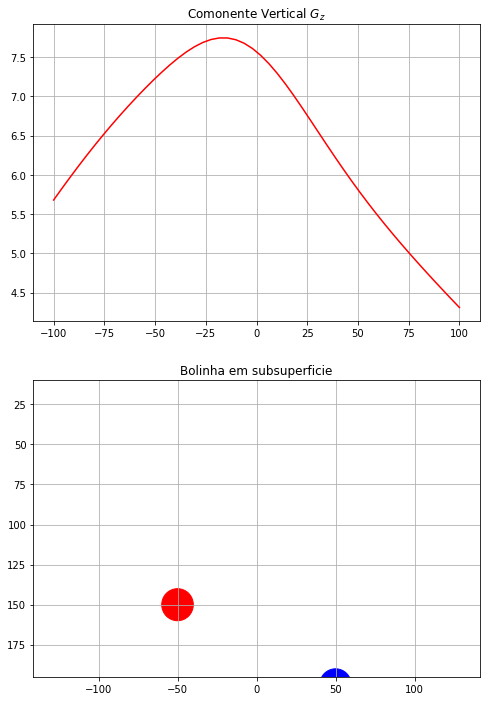

In [24]:
# plotando o resultado:
plt.figure(figsize=(8,12))
circle1=plt.Circle((xc[0],zc[0]),radius=raio,color =  'r')
circle2 = plt.Circle((xc[1],zc[1]),radius=raio,color = 'b')
plt.subplot(2,1,1)
plt.plot(x,gz,'r')
plt.title('Comonente Vertical $G_z$')
plt.grid()

plt.subplot(2,1,2)
#plt.contourf(X, Y, U1, 25, cmap = plt.cm.jet)
plt.gcf().gca().add_artist(circle1)
plt.gcf().gca().add_artist(circle2)
plt.title('Bolinha em subsuperficie')
plt.grid()
plt.xlim( ((z[25])/2 - 1.5*(zmed+2*raio)/2, ((-z[25])/2) + 1.5*(zmed+2*raio)/2 ) )
plt.ylim( (z[25] , zmed + 2*raio) )
plt.gca().invert_yaxis()
plt.savefig('TODO_023.pdf', dpi=300, transparet=True, bbox_inches='tight')
#plt.colorbar()
plt.show()